In [2]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)
import joblib
from skimage.io import imread
from skimage.transform import resize
from collections import Counter

In [3]:
#data_path_car = 'C:\\Users\\zoomt\\Downloads\\vehicles\\vehicles\\KITTI_extracted'
data_path_car = 'C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\vehicles\\vehicles\\KITTI_extracted'
#data_path_not_car = 'C:\\Users\\zoomt\\Downloads\\non-vehicles\\non-vehicles\\Extras'
data_path_not_car = 'C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\non-vehicles\\non-vehicles\\Extras'

data = dict()
data['label'] = []
data['data'] = []  

#Add vehicle files
for file in os.listdir(data_path_car):
    if file[-3:] in {'png'}:
        im = imread(os.path.join(data_path_car, file))
        data['label'].append("vehicle")
        data['data'].append(im)

#Add non-vehicle files
for file in os.listdir(data_path_not_car):
    if file[-3:] in {'png'}:
        im = imread(os.path.join(data_path_not_car, file))
        data['label'].append("non-vehicle")
        data['data'].append(im)
        
data = pd.DataFrame(data)
data

,label,data
0,vehicle,"[[[34, 36, 42], [33, 35, 42], [33, 33, 40], [3..."
1,vehicle,"[[[73, 79, 92], [71, 78, 91], [67, 76, 89], [6..."
2,vehicle,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,vehicle,"[[[40, 40, 27], [44, 32, 20], [57, 29, 21], [1..."
4,vehicle,"[[[69, 91, 111], [35, 60, 80], [59, 76, 96], [..."
...,...,...
11029,non-vehicle,"[[[74, 77, 82], [76, 79, 84], [77, 80, 85], [7..."
11030,non-vehicle,"[[[90, 80, 55], [88, 80, 57], [92, 84, 61], [8..."
11031,non-vehicle,"[[[93, 91, 69], [94, 92, 71], [91, 88, 66], [9..."
11032,non-vehicle,"[[[66, 72, 59], [72, 76, 62], [81, 83, 69], [8..."


In [5]:
# Take a look at the data
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  11034
keys:  ['label', 'data']
image shape:  (64, 64, 3)
labels: ['non-vehicle' 'vehicle']


Counter({'vehicle': 5966, 'non-vehicle': 5068})

In [6]:
data['data'].shape
formated_data = data.copy()
formated_data['data'] = formated_data.apply(lambda row: np.array(row.data).flatten() , axis = 1).tolist()
formated_data

,label,data
0,vehicle,"[34, 36, 42, 33, 35, 42, 33, 33, 40, 33, 31, 3..."
1,vehicle,"[73, 79, 92, 71, 78, 91, 67, 76, 89, 62, 74, 8..."
2,vehicle,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."
3,vehicle,"[40, 40, 27, 44, 32, 20, 57, 29, 21, 163, 90, ..."
4,vehicle,"[69, 91, 111, 35, 60, 80, 59, 76, 96, 33, 49, ..."
...,...,...
11029,non-vehicle,"[74, 77, 82, 76, 79, 84, 77, 80, 85, 77, 81, 8..."
11030,non-vehicle,"[90, 80, 55, 88, 80, 57, 92, 84, 61, 85, 78, 5..."
11031,non-vehicle,"[93, 91, 69, 94, 92, 71, 91, 88, 66, 91, 88, 6..."
11032,non-vehicle,"[66, 72, 59, 72, 76, 62, 81, 83, 69, 84, 85, 7..."


In [7]:
X = np.vstack(formated_data['data'].tolist()) / 255.0
y = formated_data['label']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
NN = MLPClassifier(verbose='true')
%time NN.fit(X_train, y_train)

Iteration 1, loss = 0.79977164
Iteration 2, loss = 0.27190028
Iteration 3, loss = 0.20911017
Iteration 4, loss = 0.17647600
Iteration 5, loss = 0.14775789
Iteration 6, loss = 0.13071020
Iteration 7, loss = 0.11836843
Iteration 8, loss = 0.10830751
Iteration 9, loss = 0.09160134
Iteration 10, loss = 0.08983586
Iteration 11, loss = 0.09949846
Iteration 12, loss = 0.08299274
Iteration 13, loss = 0.08255629
Iteration 14, loss = 0.05920574
Iteration 15, loss = 0.05822219
Iteration 16, loss = 0.05350908
Iteration 17, loss = 0.04569776
Iteration 18, loss = 0.05245060
Iteration 19, loss = 0.05175984
Iteration 20, loss = 0.04347405
Iteration 21, loss = 0.03291962
Iteration 22, loss = 0.03263522
Iteration 23, loss = 0.02945297
Iteration 24, loss = 0.03254759
Iteration 25, loss = 0.03237163
Iteration 26, loss = 0.02344192
Iteration 27, loss = 0.02214900
Iteration 28, loss = 0.02527085
Iteration 29, loss = 0.02013628
Iteration 30, loss = 0.02458053
Iteration 31, loss = 0.01886780
Iteration 32, los

MLPClassifier(verbose='true')

In [21]:
from sklearn.metrics import confusion_matrix
y_pred = NN.predict(X_test)
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))
print(confusion_matrix(y_test,y_pred))


Percentage correct:  98.41413683733575
[[1001   13]
 [  22 1171]]


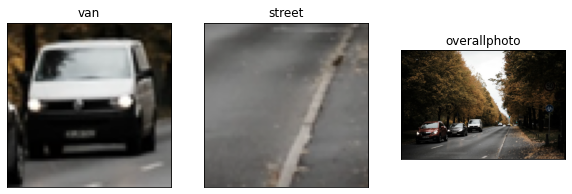

In [10]:
## Test on new picture

van = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\van2.png')
street = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\street2.png')
overallphoto = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\overallphoto.jpg')
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,10)
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(van, cmap='gray')
ax[0].set_title('van')
ax[1].imshow(street, cmap='gray')
ax[1].set_title('street')
ax[2].imshow(overallphoto, cmap='gray')
ax[2].set_title('overallphoto')
plt.show()

In [11]:
def prep_image(image):
    return np.array(image).flatten().reshape(1,-1)

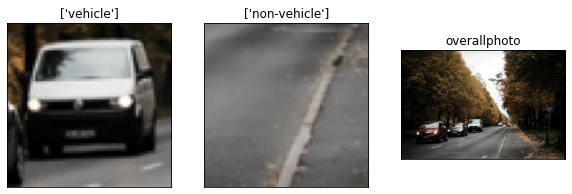

In [16]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(10,10)
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(van, cmap='gray')
ax[0].set_title(NN.predict(prep_image(van)))
ax[1].imshow(street, cmap='gray')
ax[1].set_title(NN.predict(prep_image(street)))
ax[2].imshow(overallphoto, cmap='gray')
ax[2].set_title('overallphoto')
plt.show()


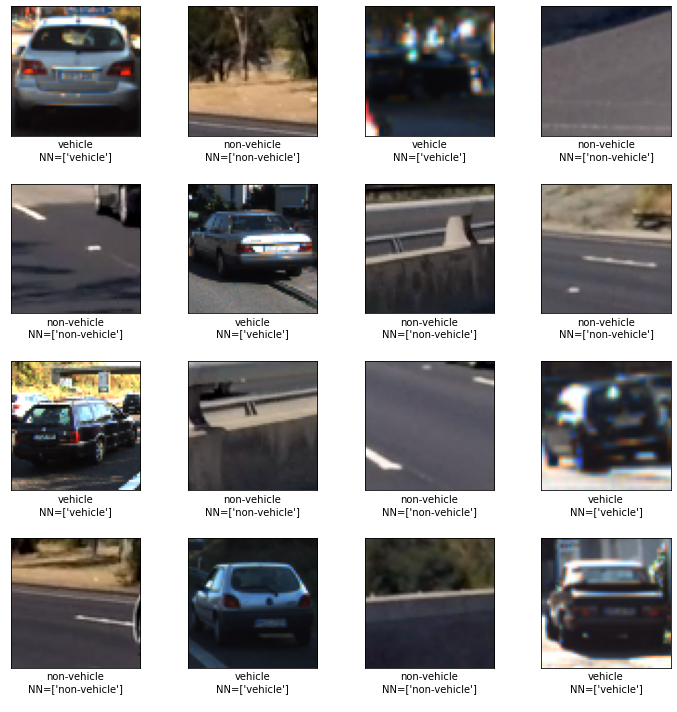

In [20]:
df_plot = data.sample(100, random_state=13).copy()
fig, ax = plt.subplots(4,4, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    image = df_plot['data'].values[i]
    axi.imshow(image,cmap='gray')
    axi.set(xticks=[], yticks=[], xlabel = '{}\nNN={}\n'.format(df_plot['label'].values[i], NN.predict(prep_image(image))))
    
fig.tight_layout()

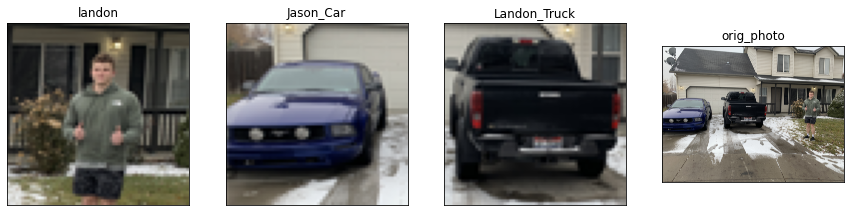

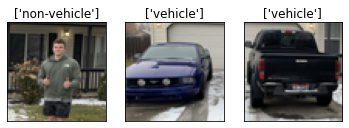

In [15]:
landon = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\LandonHuman.png')
Jason_Car = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\JsonCar.png')
Landon_Truck = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\LandonTuck.png')
orig_photo = imread('C:\\Users\\zoomt\\Desktop\\Programs\\MACHINELEARNING\\CS334-AML\\FinalProject\\pictures\\OriginalPhoto.jpg')

fig, ax = plt.subplots(1,4)
fig.set_size_inches(15,15)
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(landon, cmap='gray')
ax[0].set_title('landon')
ax[1].imshow(Jason_Car, cmap='gray')
ax[1].set_title('Jason_Car')
ax[2].imshow(Landon_Truck, cmap='gray')
ax[2].set_title('Landon_Truck')
ax[3].imshow(orig_photo, cmap='gray')
ax[3].set_title('orig_photo')
plt.show()

fig2, ax2 = plt.subplots(1,3)
fig.set_size_inches(15,15)
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax2]
 
ax2[0].imshow(landon, cmap='gray')
ax2[0].set_title(NN.predict(prep_image(landon)))
ax2[1].imshow(Jason_Car, cmap='gray')
ax2[1].set_title(NN.predict(prep_image(Jason_Car)))
ax2[2].imshow(Landon_Truck, cmap='gray')
ax2[2].set_title(NN.predict(prep_image(Landon_Truck)))
plt.show()